## NEW FINAL DATASET WITH UPDATED THEMES 21 MAY: 'datasetforRecommendations.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px


In [5]:
# df=pd.read_csv('preprocessed_book_ratings.csv')
df=pd.read_csv('datasetforRecommendations.csv')

In [6]:
df['finegrained_Theme'].unique()


array(['Psychological Thriller', 'Crime Thrillers and Detective Drama',
       'Spiritual and Self-Help', 'Vampire/Paranormal Fantasy',
       'Cozy Mysteries', 'Apocalyptic Fiction', 'Espionage Thriller',
       'Family Dynamics and Relationships', 'Space Adventures',
       'Galactic Adventures', 'Romantic Suspense', 'Epic Fantasy',
       'Historical Time-Travel Romance', 'American Literature Classics',
       'Arthurian Legend and Medieval Fantasy', 'Holiday Classics',
       'Humor, Satire and Comics', 'Medical Thrillers', 'Culinary Arts',
       'Romantic Relationships', 'International Literature',
       'Wizarding World', 'Family Dynamics and Loss',
       'Young Adult Non-Fiction', 'War and Historical Drama'],
      dtype=object)

In [25]:
def update_topic_themes(df):
    # Dictionary mapping Topic numbers to new theme names
    new_topic_names = {
        0: "Family Dynamics and Relationships",
        1: "Crime Thrillers and Detective Drama",
        2: "Vampire/Paranormal Fantasy",
        3: "Spiritual and Self-Help",
        4: "Space Adventures",
        5: "Humor, Satire and Comics",
        6: "Espionage Thriller",
        7: "Epic Fantasy",
        8: "Galactic Adventures",
        9: "Cozy Mysteries",
        10: "Medical Thrillers",
        11: "Culinary Arts",
        12: "Historical Time-Travel Romance",
        13: "American Literature Classics",
        14: "Holiday Classics",
        15: "Romantic Relationships",
        16: "Arthurian Legend and Medieval Fantasy",
        17: "Romantic Suspense",
        18: "War and Historical Drama",
        19: "Wizarding World",
        20: "International Literature",
        21: "Young Adult Non-Fiction",
        22: "Family Dynamics and Loss",
        23: "Psychological Thriller",
        24: "Apocalyptic Fiction"
    }
    
    # Create a new column with the updated theme names
    df['finegrained_Theme'] = df['finegrained_topic_no'].map(new_topic_names)
    
    return df


df = update_topic_themes(df)

In [28]:
def create_broader_genres(df):
    # Dictionary mapping fine-grained themes to broader genres
    broader_genres = {
        # Romance and Family
        "Family Dynamics and Relationships": "Romance and Family",
        "Romantic Relationships": "Romance and Family",
        "Historical Time-Travel Romance": "Romance and Family",
        "Family Dynamics and Loss": "Romance and Family",
        
        # Fantasy
        "Epic Fantasy": "Fantasy",
        "Wizarding World": "Fantasy",
        "Arthurian Legend and Medieval Fantasy": "Fantasy",
        "Vampire/Paranormal Fantasy": "Fantasy",
        
        # Science Fiction
        "Space Adventures": "Science Fiction",
        "Galactic Adventures": "Science Fiction",
        "Apocalyptic Fiction": "Science Fiction",
        
        # Crime/Detective
        "Crime Thrillers and Detective Drama": "Crime and Detective",
        "Cozy Mysteries": "Crime and Detective",
        "Medical Thrillers": "Crime and Detective",
        
        # Action/Psychological Thriller
        "Psychological Thriller": "Action and Psychological Thriller",
        "Espionage Thriller": "Action and Psychological Thriller",
        "Romantic Suspense": "Action and Psychological Thriller",
        
        # Literary Classics
        "American Literature Classics": "Literary Classics",
        "International Literature": "Literary Classics",
        
        # Self-Help & Lifestyle
        "Spiritual and Self-Help": "Self-Help and Lifestyle",
        "Culinary Arts": "Self-Help and Lifestyle",
        "Young Adult Non-Fiction": "Self-Help and Lifestyle",   #because the books were young adult non fiction
        
       
        "War and Historical Drama": "War and Historical Drama",
        "Holiday Classics": "Holiday Classics",
        "Humor, Satire and Comics": "Humor, Satire and Comics"
    }
    
    # Create a new column with the broader genres
    df['broader_genre'] = df['finegrained_Theme'].map(broader_genres)
    
    return df

# Example usage:
df = create_broader_genres(df)

In [33]:
df

,Book-Title,Book-Author,User-ID,ISBN,Book-Rating,Year-Of-Publication,Publisher,Location,Age,category,description,num_words,num_chars,cleaned_description,finegrained_topic_no,finegrained_Theme,merged_topic_no,merged_Theme,broader_genre
0,The Terminal Man,Michael Crichton,276964,0345354621,10,1988,Ballantine Books,"villa ridge, missouri, usa",34.0,Fiction,Hearry Benson suffers from violent seizures. W...,54,335,hearry benson suffers violent seizure becomes ...,23.0,Psychological Thriller,2.0,Action & Psychological Thrillers,Action and Psychological Thriller
1,The Chamber,John Grisham,276964,0440220602,9,1995,Dell Publishing Company,"villa ridge, missouri, usa",34.0,American fiction,While the executioners prepare the gas chamber...,26,155,executioner prepare gas chamber protester gath...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction,Crime and Detective
2,The Girl Who Loved Tom Gordon : A Novel,Stephen King,276964,0684867621,8,1999,Scribner,"villa ridge, missouri, usa",34.0,Fiction,A story of a nine year old who wanders off in ...,19,90,story nine year old wanders wilderness area he...,3.0,Spiritual and Self-Help,6.0,Spiritual & Mindfulness,Self-Help and Lifestyle
3,In the Dark,Richard Laymon,276964,0843949163,8,2001,Leisure Books,"villa ridge, missouri, usa",34.0,California,A tale of suspense follows young librarian Jan...,44,250,tale suspense follows young librarian jane ker...,2.0,Vampire/Paranormal Fantasy,3.0,Fantasy Literature,Fantasy
4,Tailchaser's Song,Tad Williams,276964,0886773741,7,1994,Daw Books,"villa ridge, missouri, usa",34.0,Fiction,"Fritti Tailchaser, a ginger tomcat of courage ...",31,199,fritti tailchaser ginger tomcat courage curios...,9.0,Cozy Mysteries,2.0,Action & Psychological Thrillers,Crime and Detective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70617,Deception on His Mind,ELIZABETH GEORGE,276688,0553575090,7,1998,Bantam,"fort lee, new jersey, usa",NaN,Fiction,When a member of the small but growing Asian c...,59,387,member small growing asian community found dea...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction,Crime and Detective
70618,Stalker: A Novel (Peter Decker &amp; Rina Laza...,Faye Kellerman,276688,0688156134,8,2000,William Morrow &amp; Company,"fort lee, new jersey, usa",NaN,Fiction,A first-year rookie with the LAPD's Hollywood ...,254,1542,rookie lapd hollywood division cynthia decker ...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction,Crime and Detective
70619,"Money, Money, Money : A Novel of the 87th Prec...",Ed McBain,276688,0743202694,10,2001,Simon &amp; Schuster,"fort lee, new jersey, usa",NaN,Fiction,It's Christmas in the city. A retired Gulf War...,33,173,christmas city retired gulf war pilot couple a...,14.0,Holiday Classics,9.0,Holiday Stories,Holiday Classics
70620,Wiener Dog Art,Gary Larson,276688,0836218655,10,1990,Andrews McMeel Publishing,"fort lee, new jersey, usa",NaN,Humor,"1990 FarWorks, Inc. All Rights Reserved. The F...",19,122,1990 farworks right reserved far side larson s...,15.0,Romantic Relationships,0.0,Romance & Relationships,Romance and Family


# ANALYSING THE DATASET

In [34]:
#First let's check theme distribution based on unique ISBNs

unique_books = df.drop_duplicates(subset=['ISBN'])
unique_theme_df = pd.DataFrame({
    'Count': unique_books['finegrained_Theme'].value_counts(),
    'Percentage': unique_books['finegrained_Theme'].value_counts() / len(unique_books) * 100
}).sort_values('Count', ascending=False)

unique_merged_theme_df= pd.DataFrame({
    'Count': unique_books['merged_Theme'].value_counts(),
    'Percentage': unique_books['merged_Theme'].value_counts() / len(unique_books) * 100
}).sort_values('Count', ascending=False)


#Now, let's evaluate the entire dataset
entire_theme_df = pd.DataFrame({
    'Count': df['finegrained_Theme'].value_counts(),
    'Percentage': df['finegrained_Theme'].value_counts() / len(df) * 100
}).sort_values('Count', ascending=False)

merged_theme_df= pd.DataFrame({
    'Count': df['merged_Theme'].value_counts(),
    'Percentage': df['merged_Theme'].value_counts() / len(df) * 100
}).sort_values('Count', ascending=False)

broader_theme_df= pd.DataFrame({
    'Count': df['broader_genre'].value_counts(),
    'Percentage': df['broader_genre'].value_counts() / len(df) * 100
}).sort_values('Count', ascending=False)




merged_theme_df

,Count,Percentage
Romance & Relationships,16022,22.686981
Fantasy Literature,12979,18.378126
Crime & Detective Fiction,12424,17.592252
Action & Psychological Thrillers,7562,10.707711
Literary Classics,7090,10.039365
Science Fiction,4335,6.138314
Spiritual & Mindfulness,3889,5.506783
Humor & Satire,2941,4.164425
Holiday Stories,1357,1.921498
Culinary Arts,1092,1.546260


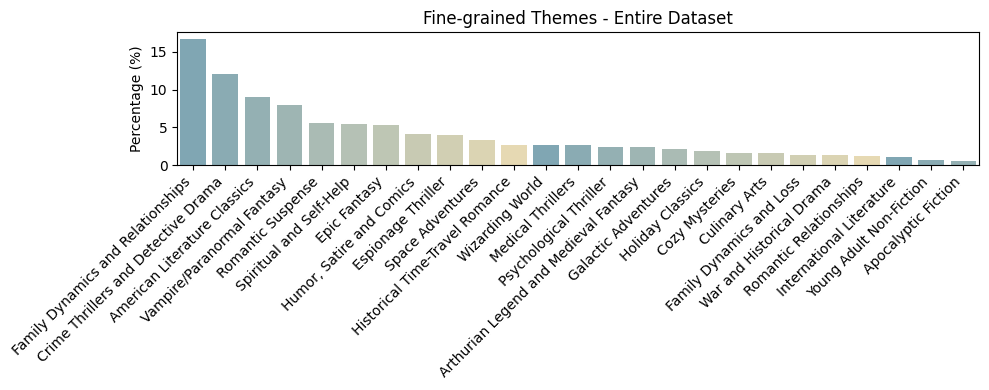

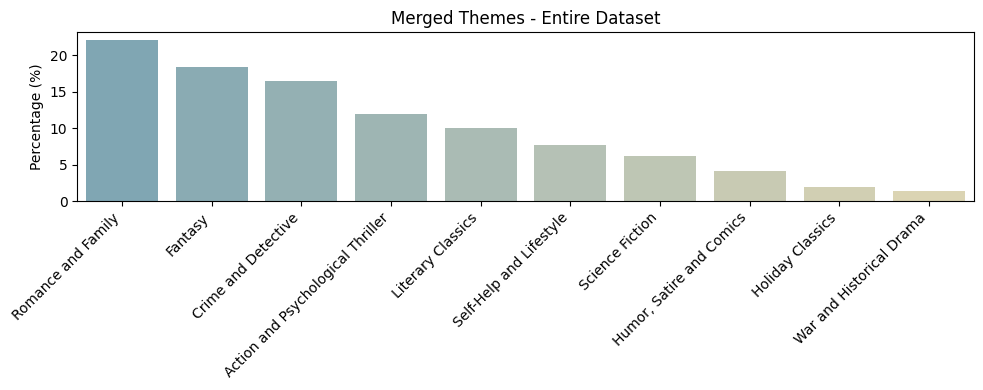

In [35]:
custom_palette = sns.color_palette("blend:#7AB,#EDA", n_colors=11)
plt.figure(figsize=(10, 4))
sns.barplot(x=entire_theme_df.index, y='Percentage', data=entire_theme_df, palette=custom_palette)
plt.title('Fine-grained Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.tight_layout()
# plt.savefig('fine-grained-dataset.png')
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=broader_theme_df.index, y='Percentage', data=broader_theme_df, palette=custom_palette)
plt.title('Merged Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig('merged-dataset.png')
plt.show()

In [36]:
# df.to_csv('datasetforRecommendations.csv', index=False)

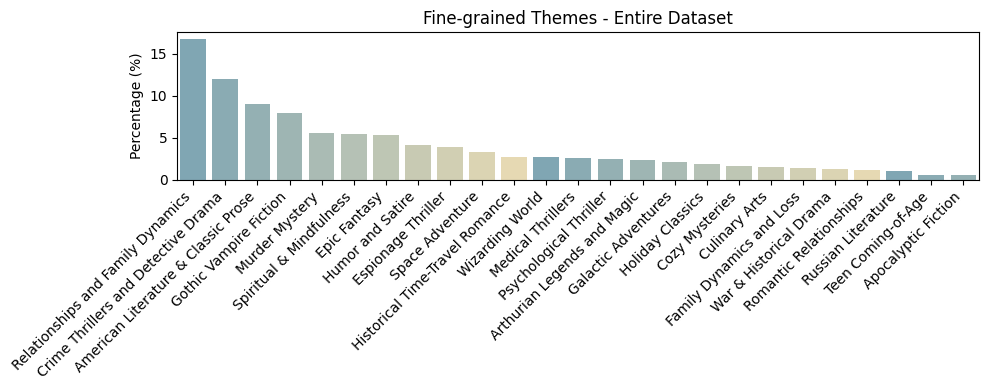

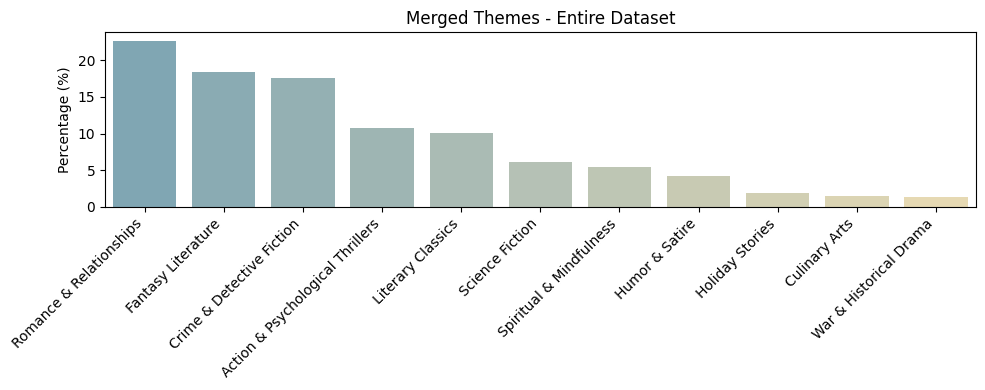

In [125]:
custom_palette = sns.color_palette("blend:#7AB,#EDA", n_colors=11)
# Prepare plots for fine-grained theme distributions
# Plot 1: Theme distribution for unique books
# plt.figure(figsize=(10, 4))
# sns.barplot(x=unique_theme_df.index, y='Percentage', data=unique_theme_df)
# plt.title('Fine-grained Themes - Unique Books')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Percentage (%)')
# plt.tight_layout()
# plt.show()

# Plot 2: Theme distribution for entire dataset
plt.figure(figsize=(10, 4))
sns.barplot(x=entire_theme_df.index, y='Percentage', data=entire_theme_df, palette=custom_palette)
plt.title('Fine-grained Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.tight_layout()
# plt.savefig('fine-grained-dataset.png')
plt.show()

# # Plot 3: Theme distribution for unique books- merged
# plt.figure(figsize=(12, 6))
# sns.barplot(x=merged_theme_df.index, y='Percentage', data=merged_theme_df)
# plt.title('Merged Themes - Unique Books')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Percentage (%)')
# plt.tight_layout()
# plt.show()

# Plot 4: Theme distribution for entire dataset- merged
plt.figure(figsize=(10, 4))
sns.barplot(x=merged_theme_df.index, y='Percentage', data=merged_theme_df, palette=custom_palette)
plt.title('Merged Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig('merged-dataset.png')
plt.show()

# ANALYSING THE RECOMMENDATIONS

In [8]:
# Read all recommendation CSV files
# rec_MF = pd.read_csv('recommendations_finetuned_MF-Copy1.csv')
# rec_MostPop = pd.read_csv('recommendations_finetuned_MostPop-Copy1.csv')
# rec_NeuMF = pd.read_csv('recommendations_finetuned_NeuMF-Copy1.csv')
# rec_NMF = pd.read_csv('recommendations_finetuned_NMF-Copy1.csv')
# rec_PF = pd.read_csv('recommendations_finetuned_PF-Copy1.csv')
# rec_PMF = pd.read_csv('recommendations_finetuned_PMF-Copy1.csv')
# rec_random = pd.read_csv('recommendations_finetuned_random-Copy1.csv')
# rec_UserKNN = pd.read_csv('recommendations_finetuned_UserKNN-Copy1.csv')
# rec_VAECF = pd.read_csv('recommendations_finetuned_VAECF-Copy1.csv')
# rec_WMF = pd.read_csv('recommendations_finetuned_WMF-Copy1.csv')
# rec_BPR = pd.read_csv('recommendations_finetuned_BPR-Copy1.csv')


rec_MF = pd.read_csv('recommendations_finetuned_thrMF.csv')
rec_MostPop = pd.read_csv('recommendations_finetuned_thrMostPop.csv')
rec_NeuMF = pd.read_csv('recommendations_finetuned_thrNeuMF.csv')
rec_NMF = pd.read_csv('recommendations_finetuned_thrNMF.csv')
rec_PF = pd.read_csv('recommendations_finetuned_thrPF.csv')
rec_PMF = pd.read_csv('recommendations_finetuned_thrPMF.csv')
rec_random = pd.read_csv('recommendations_finetuned_random_thr.csv')
rec_UserKNN = pd.read_csv('recommendations_finetuned_thrUserKNN.csv')
rec_VAECF = pd.read_csv('recommendations_finetuned_thrVAECF.csv')
rec_WMF = pd.read_csv('recommendations_finetuned_thrWMF.csv')
rec_BPR = pd.read_csv('recommendations_finetuned_thrBPR.csv')


In [9]:
# Create a dictionary of all recommendation dataframes
rec_dfs = {
    'Random': rec_random,
    'MostPop': rec_MostPop,
    'UserKNN': rec_UserKNN,
    'WMF': rec_WMF,
    'BPR': rec_BPR,
    'MF': rec_MF,
    'NMF': rec_NMF,
    'PF': rec_PF,
    'PMF': rec_PMF,
    'NeuMF': rec_NeuMF,
    'VAECF': rec_VAECF,
    
}



In [150]:
def plot_theme_horizontal_subplots(rec_dfs_dict, original_df, top_n=12, row='merged_Theme', name='default.png'):
   
    theme_mapping = original_df[['ISBN', row]].drop_duplicates()
    algo_names = list(rec_dfs_dict.keys())
    num_algos = len(algo_names)

    # Get global top-N themes
    all_rec = pd.concat(rec_dfs_dict.values())
    all_rec_with_themes = all_rec.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')
    top_themes = all_rec_with_themes[row].value_counts().head(top_n).index.tolist()

    # Subplot layout
    cols = 4
    rows = math.ceil(num_algos / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.5, rows * 4), sharey=True)
    axes = axes.flatten()

    # Color palette: consistent across all plots
    theme_colors = dict(zip(top_themes, sns.color_palette("Set2", n_colors=len(top_themes))))

    for idx, algo_name in enumerate(algo_names):
        rec_df = rec_dfs_dict[algo_name]
        rec_with_themes = rec_df.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')

        theme_counts = rec_with_themes[row].value_counts()
        theme_pct = (theme_counts / len(rec_with_themes)) * 100

        # Ensure all top themes are represented, fill missing with 0
        data = pd.DataFrame({
            'Theme': top_themes,
            'Percentage': [theme_pct.get(theme, 0.0) for theme in top_themes]
        })

        ax = axes[idx]
        sns.barplot(
            x='Percentage',
            y='Theme',
            data=data,
            palette=[theme_colors[t] for t in data['Theme']],
            ax=ax
        )
        ax.set_title(f"({chr(97 + idx)}) {algo_name}", fontsize=12)
        ax.set_xlabel("Recommendation %")
        ax.set_ylabel("Themes")
        ax.set_xlim(0, 60)  
        ax.set_xticks(range(0, 61, 5))  
      

    # Hide any unused subplots
    for i in range(num_algos, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle("Theme Distribution Across Algorithms", fontsize=16, y=1.03)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()

    


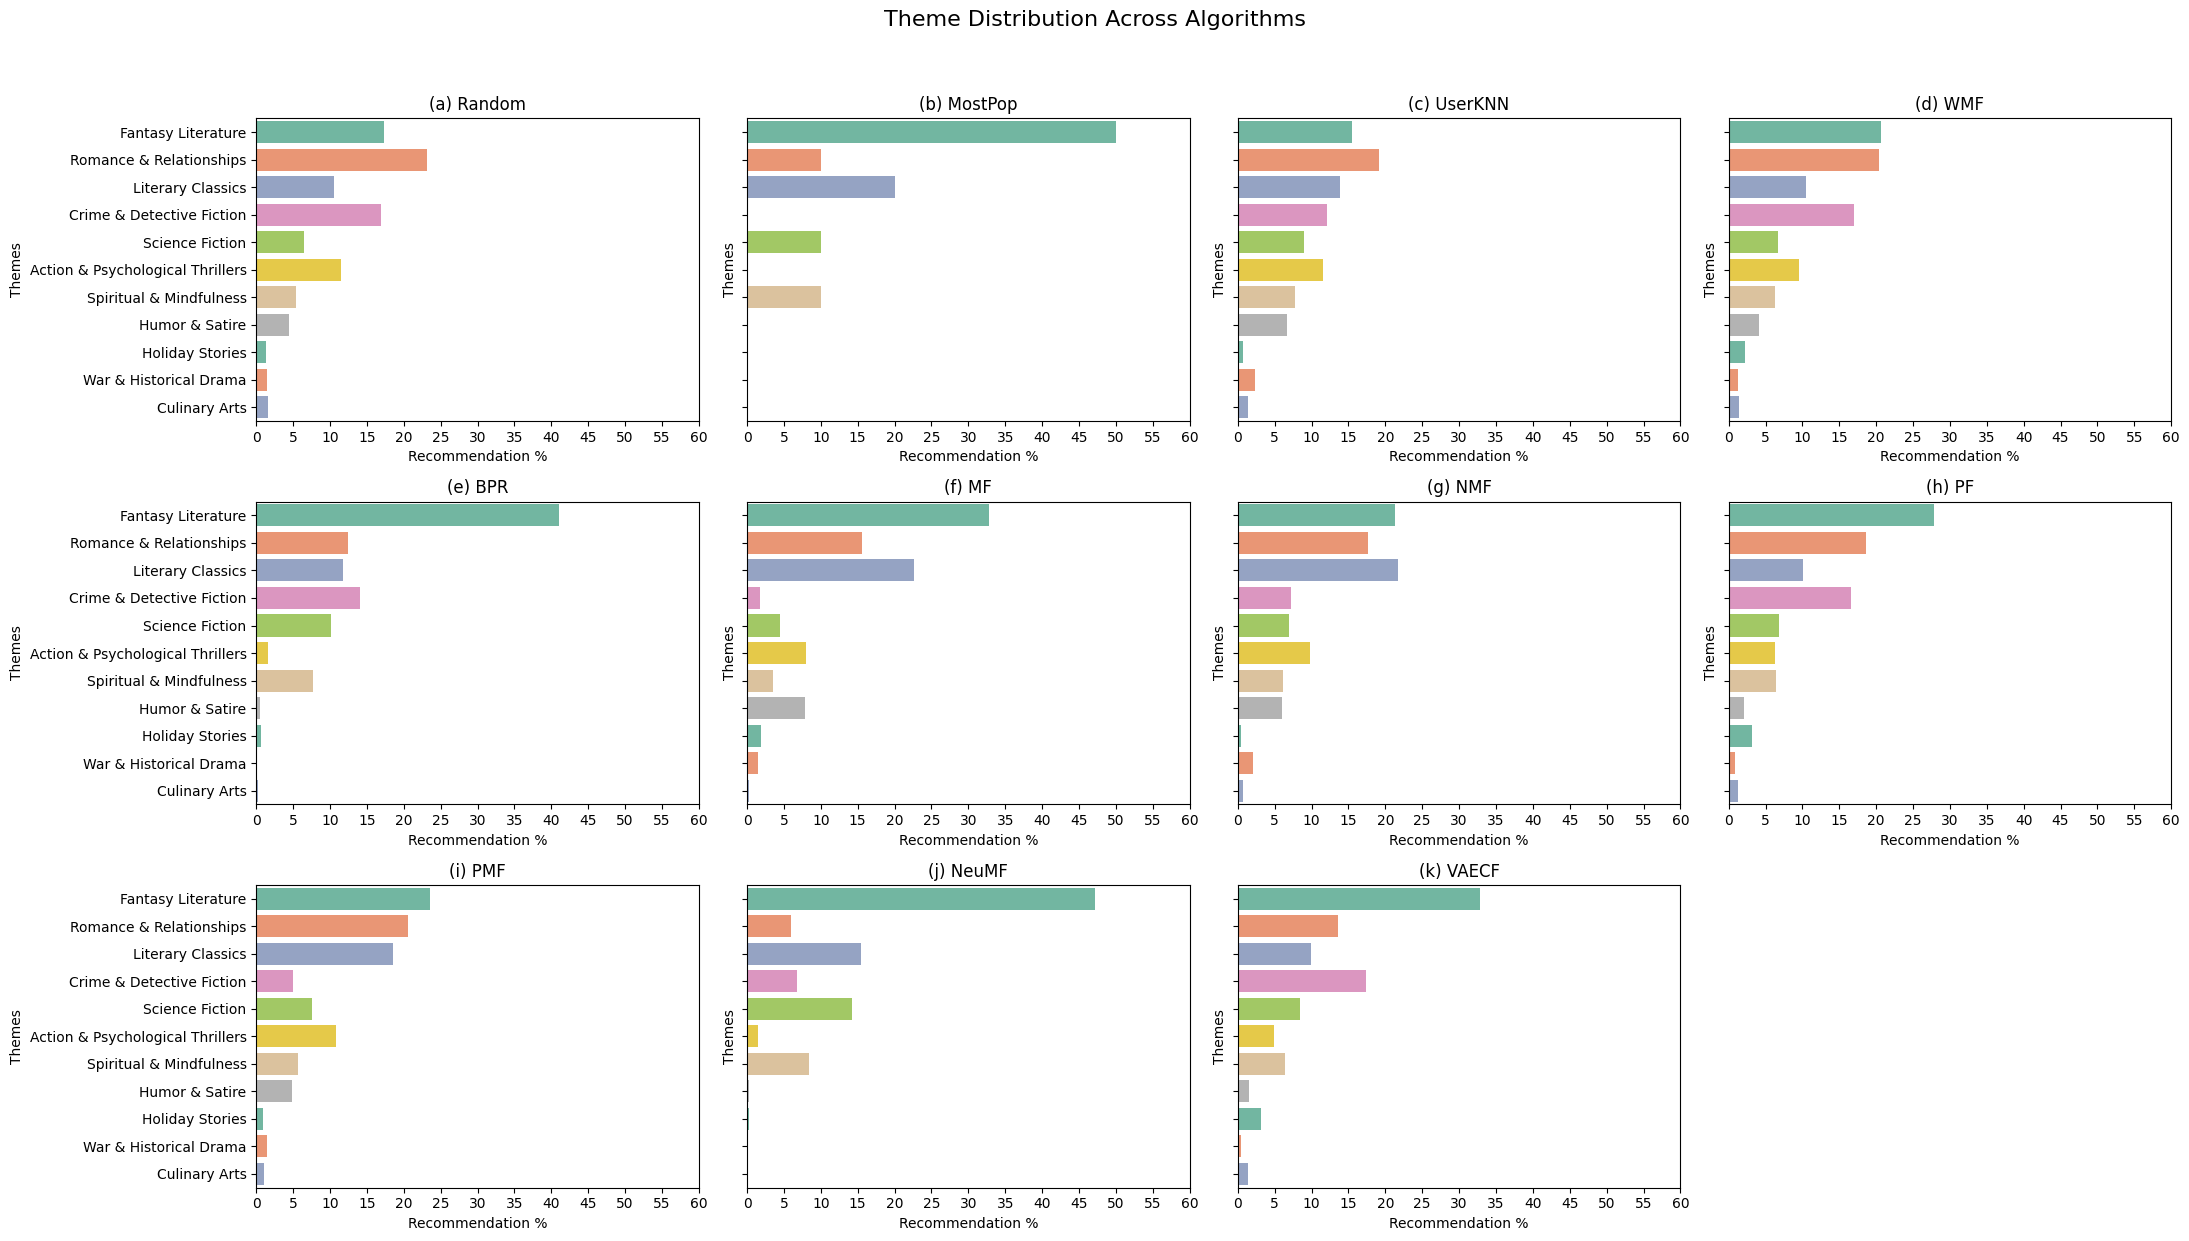

In [151]:
plot_theme_horizontal_subplots(rec_dfs, df, row= 'merged_Theme', name= 'merged.png')

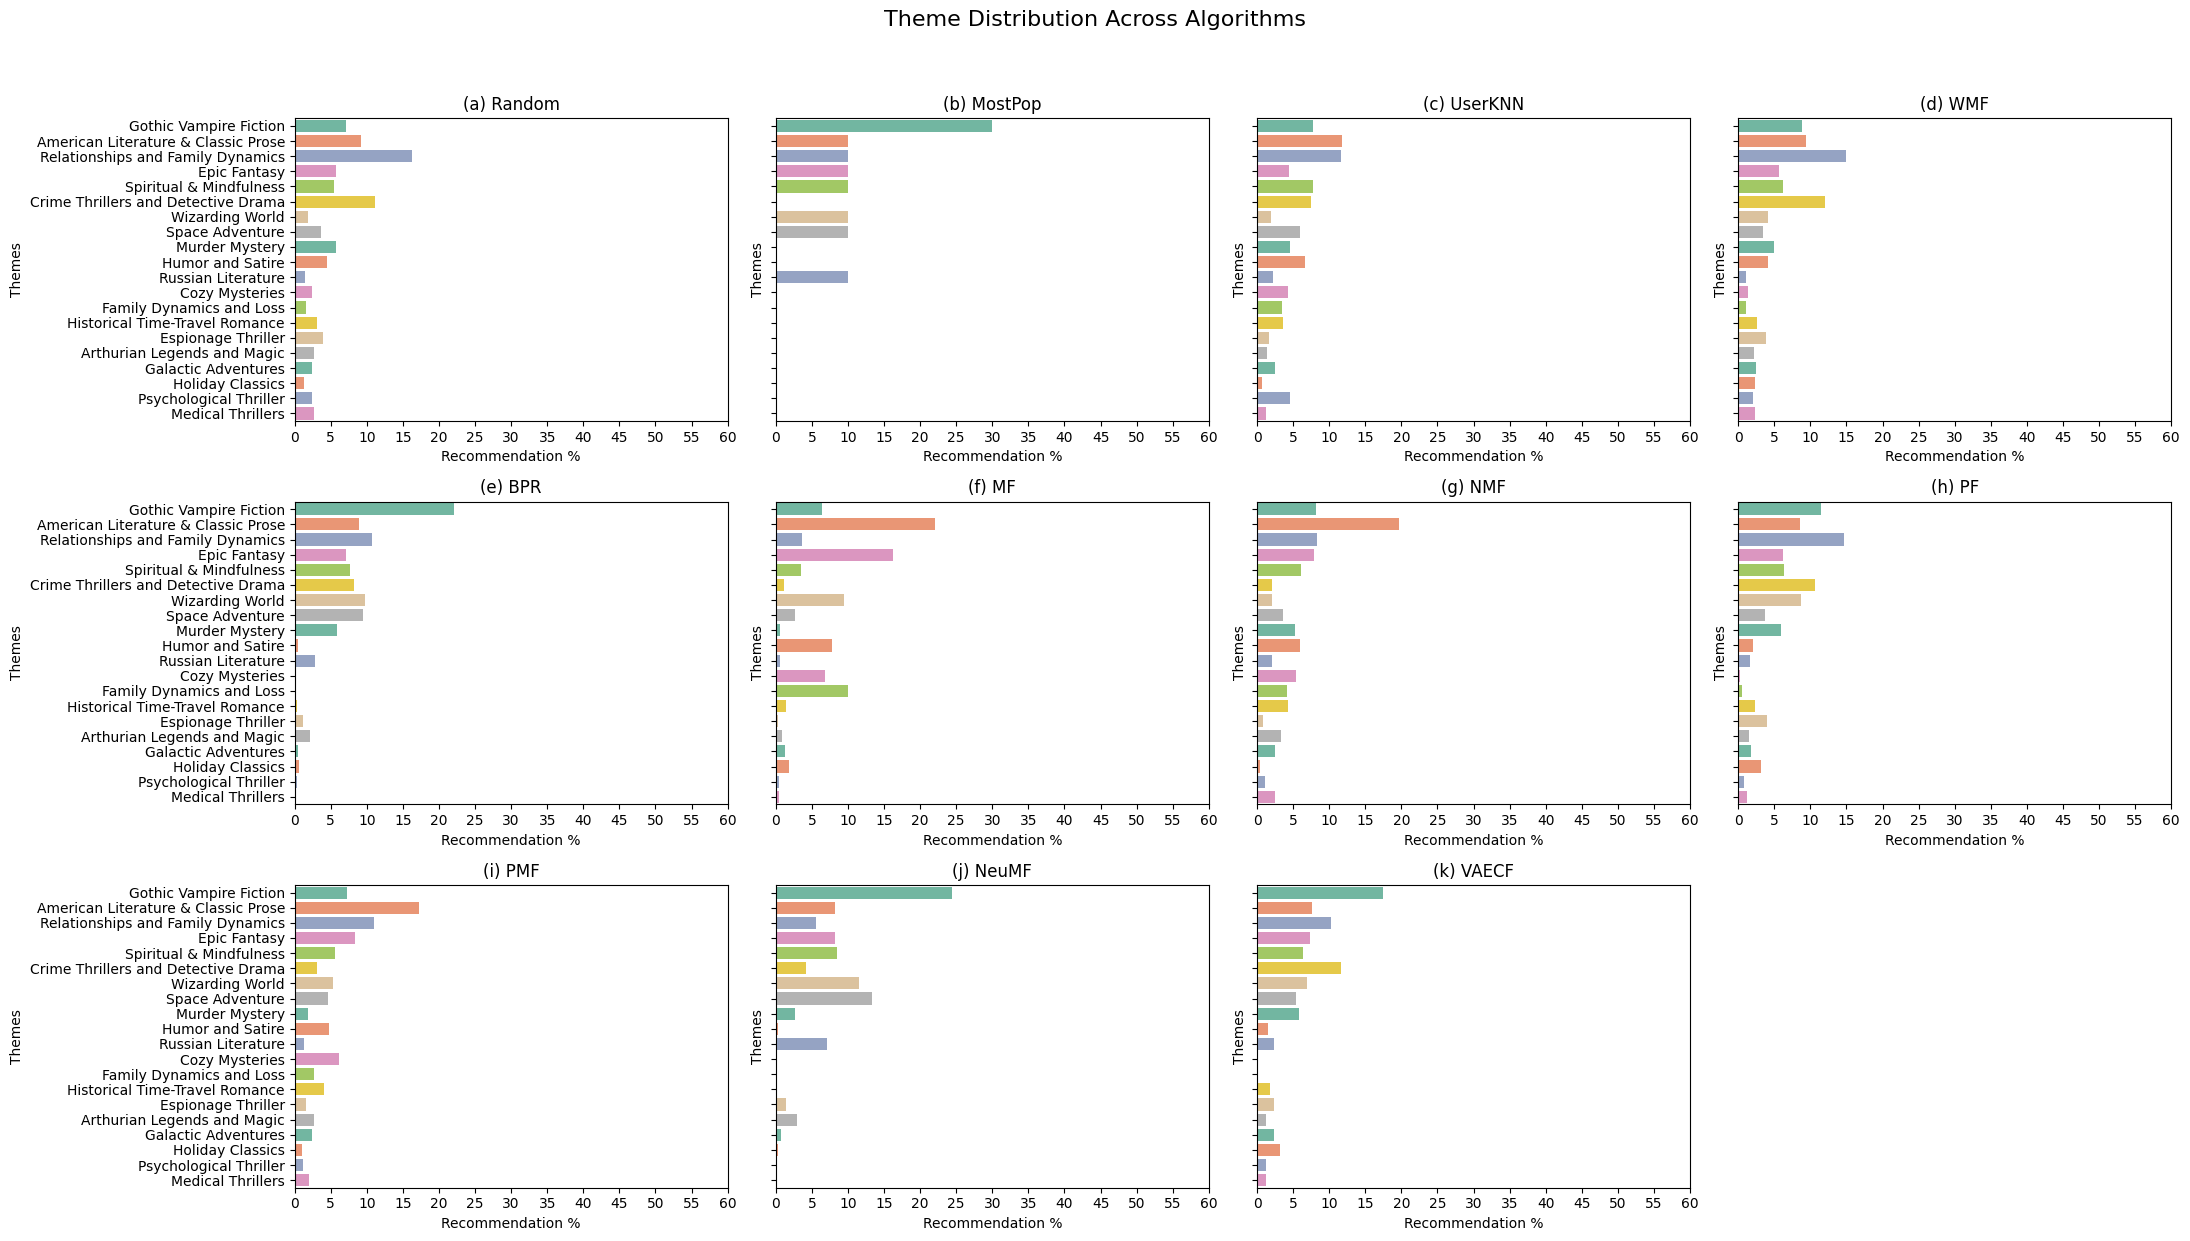

In [152]:
plot_theme_horizontal_subplots(rec_dfs, df,top_n=20, row= 'finegrained_Theme', name= 'finegrained.png')

1697     12.0
4694     12.0
7243     12.0
8809     12.0
13097    12.0
18660    12.0
20022    12.0
21853    12.0
29261    12.0
30793    12.0
41725    12.0
47625    12.0
48942    12.0
65209    12.0
66119    12.0
69872    12.0
70415    12.0
Name: finegrained_topic_no, dtype: float64

In [60]:
#LET'S CALCULATE THE EXPOSURE RATIO


def calculate_exposure_ratio(recommendations_df, original_df, row= 'merged_Theme'):
    # Get themes for recommendations
    theme_mapping = original_df[['ISBN', row]].drop_duplicates()
    recs_with_themes = recommendations_df.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')
    
    # Calculate theme distribution in recommendations
    rec_theme_counts = recs_with_themes[row].value_counts()
    rec_theme_pct = rec_theme_counts / len(recs_with_themes) * 100
    
    # Calculate theme distribution in original dataset
    orig_theme_counts = original_df[row].value_counts()
    orig_theme_pct = orig_theme_counts / len(original_df) * 100
    
    # Create DataFrame with both percentages
    theme_exposure = pd.DataFrame({
        'Original_Percentage': orig_theme_pct,
        'Recommendation_Percentage': rec_theme_pct
        
    })
    
    # Calculate exposure ratio
    theme_exposure['Exposure_Ratio'] = theme_exposure['Recommendation_Percentage'] / theme_exposure['Original_Percentage']
    
    # Handle potential division by zero or missing values
    theme_exposure = theme_exposure.fillna(0).replace([np.inf, -np.inf], 0)
    
    # Sort by exposure ratio in descending order
    theme_exposure = theme_exposure.sort_values('Exposure_Ratio', ascending=False)
    
    return theme_exposure


In [14]:

def plot_theme_comparison(recommendations_df, original_df, top_n=10):

    # Calculate exposure ratios using your function
    theme_exposure = calculate_exposure_ratio(recommendations_df, original_df)
    
    # Select top N themes by original percentage
    top_themes = theme_exposure.sort_values('Recommendation_Percentage', ascending=False).head(top_n)
    
    # Create a figure with proper size
    plt.figure(figsize=(12, 8))
    
    # Plot the percentages
    plt.plot(top_themes.index, top_themes['Original_Percentage'], 'bo-', label='Original %')
    plt.plot(top_themes.index, top_themes['Recommendation_Percentage'], 'go-', label='Recommendation %')
    
    # Add labels and title
    plt.title('Theme Distribution: Original vs Recommendations')
    plt.xlabel('Theme')
    plt.ylabel('Percentage (%)')
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Optional: return the data
    return top_themes

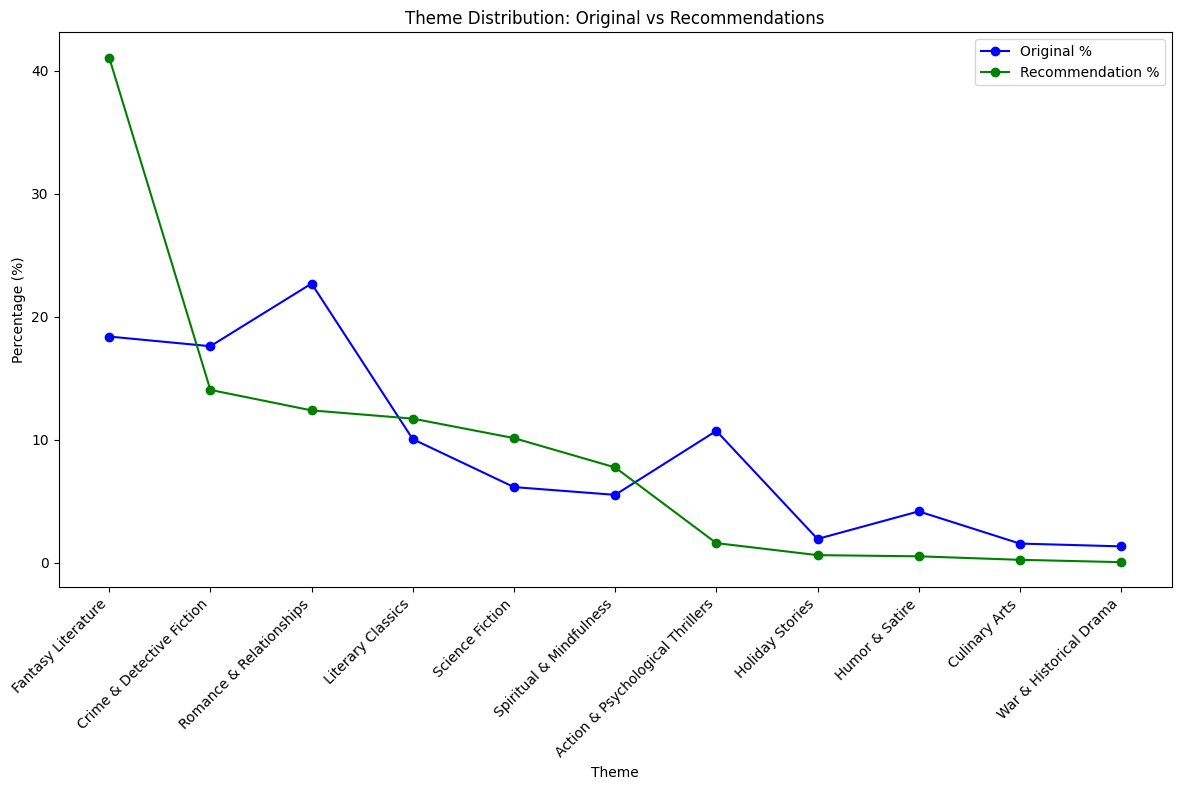

,Original_Percentage,Recommendation_Percentage,Exposure_Ratio
Fantasy Literature,18.378126,41.061473,2.234258
Crime & Detective Fiction,17.592252,14.040982,0.798134
Romance & Relationships,22.686981,12.374008,0.545423
Literary Classics,10.039365,11.705741,1.165984
Science Fiction,6.138314,10.121839,1.648961
Spiritual & Mindfulness,5.506783,7.736755,1.404950
Action & Psychological Thrillers,10.707711,1.583903,0.147922
Holiday Stories,1.921498,0.605501,0.315119
Humor & Satire,4.164425,0.509507,0.122348
Culinary Arts,1.546260,0.225217,0.145653


In [15]:
plot_theme_comparison(rec_BPR,df, top_n=12)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def plot_exposure_heatmap(rec_dfs, original_df, top_n=10, row='merged_Theme', fig='fig.png'):

    # Initialize an empty dataframe to store all results
    all_results = []
    
    # Process each algorithm
    for algo_name, rec_df in rec_dfs.items():
        # Calculate exposure ratios
        exposure_df = calculate_exposure_ratio(rec_df, original_df, row)
        
        # Reshape for easier concatenation
        exposure_df = exposure_df.reset_index().rename(columns={'index': 'Theme'})
        exposure_df['Algorithm'] = algo_name
        
        # Add to results
        all_results.append(exposure_df[['Theme', 'Algorithm', 'Exposure_Ratio']])
    
    # Combine all results
    combined_df = pd.concat(all_results)
    
    # Get top themes across all algorithms (by average exposure ratio)
    top_themes = combined_df.groupby('Theme')['Exposure_Ratio'].mean().nlargest(top_n).index
    
    # Filter for top themes
    plot_df = combined_df[combined_df['Theme'].isin(top_themes)]
    
    # Pivot for heatmap format
    heatmap_df = plot_df.pivot(index='Theme', columns='Algorithm', values='Exposure_Ratio')
    
    
    # Center color scale at 1.0 (perfect fairness)
    vmin = min(0.5, heatmap_df.min().min())
    vmax = max(1.5, heatmap_df.max().max())
    
    # Create the figure
    plt.figure(figsize=(14, 10))
    
    # Create heatmap
    ax = sns.heatmap(
        heatmap_df, 
        annot=True,  # Show values in cells
        fmt='.2f',   # Format to 2 decimal places
        cmap="PiYG",
        vmin=vmin,
        vmax=vmax,
        center=1, 
        linewidths=.5,
        cbar_kws={'label': 'Exposure Ratio (1.0 = Fair)'}
    )
    
    # Add title and labels
    plt.title('Theme Exposure Ratio Comparison Across Recommendation Algorithms', fontsize=16, pad=20)
    
    # Adjust label rotations for readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    plt.savefig(fig)
    
    # Show the plot
    plt.show()
    
    
    return heatmap_df

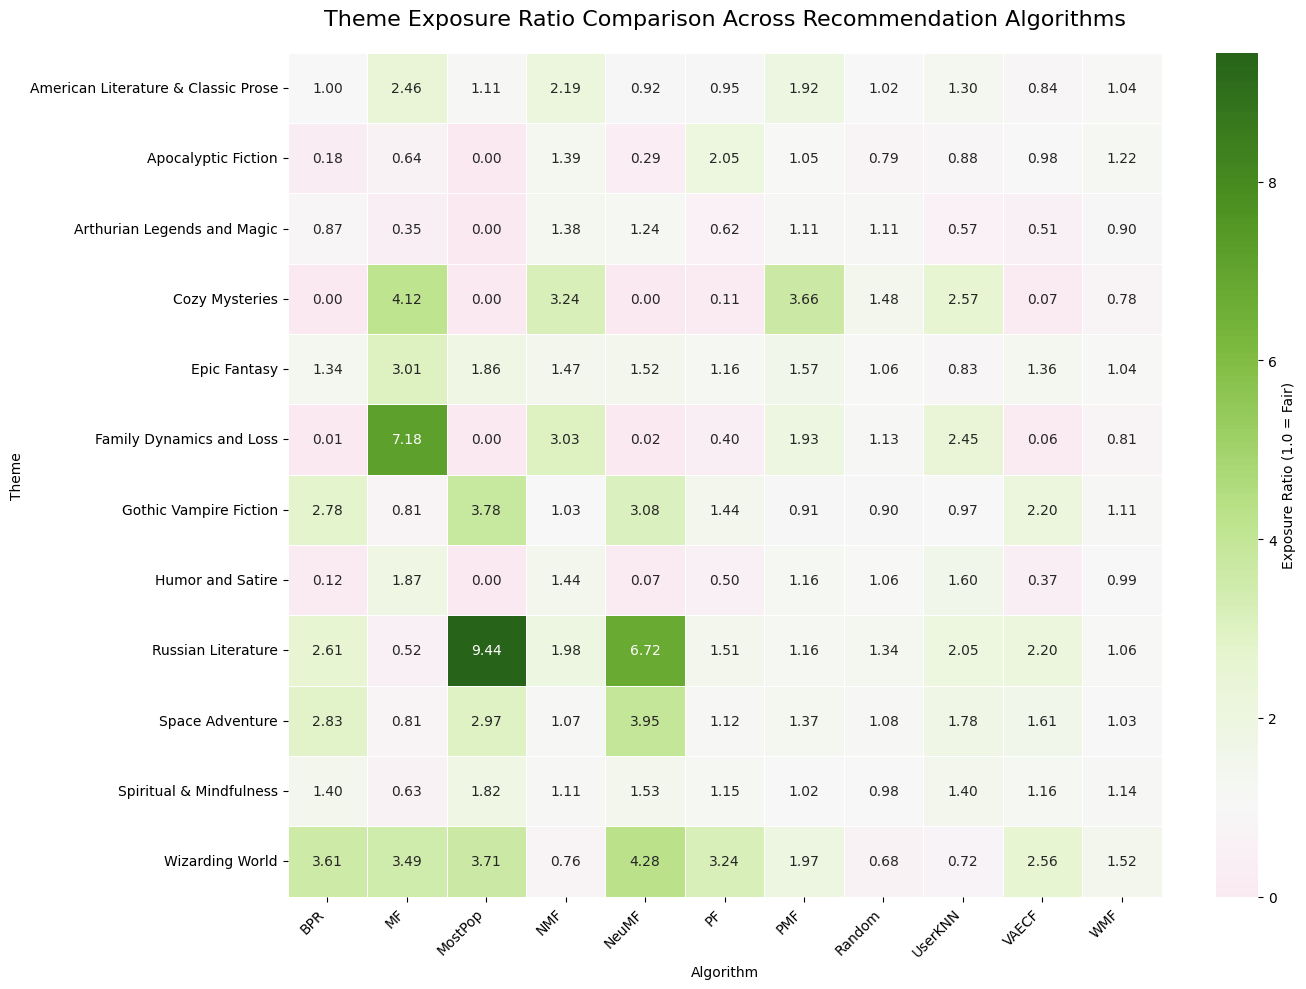

Algorithm,BPR,MF,MostPop,NMF,NeuMF,PF,PMF,Random,UserKNN,VAECF,WMF
Theme,,,,,,,,,,,
American Literature & Classic Prose,0.996181,2.456123,1.113560,2.191969,0.920121,0.950956,1.924525,1.018794,1.303916,0.842211,1.041817
Apocalyptic Fiction,0.176512,0.644114,0.000000,1.387321,0.294186,2.046918,1.046684,0.792755,0.876366,0.984750,1.217003
Arthurian Legends and Magic,0.874326,0.347708,0.000000,1.379942,1.239925,0.620740,1.113910,1.114688,0.567845,0.507949,0.899996
Cozy Mysteries,0.001107,4.121408,0.000000,3.236035,0.004427,0.111778,3.658801,1.477465,2.569793,0.067510,0.781341
Epic Fantasy,1.338797,3.014358,1.863377,1.470888,1.522830,1.163364,1.570644,1.063608,0.833480,1.362532,1.041248
Family Dynamics and Loss,0.010610,7.180355,0.000000,3.030497,0.017241,0.403182,1.928378,1.129971,2.449597,0.059682,0.806364
Gothic Vampire Fiction,2.778956,0.807468,3.777251,1.026419,3.079025,1.441775,0.911133,0.901603,0.970868,2.195552,1.109397
Humor and Satire,0.122348,1.873779,0.000000,1.443346,0.066937,0.496483,1.158312,1.063005,1.596724,0.371919,0.985430
Russian Literature,2.605678,0.522879,9.441444,1.978224,6.720732,1.514605,1.162533,1.335083,2.053170,2.199576,1.057958


In [71]:
plot_exposure_heatmap(rec_dfs,df, top_n=12, row= 'finegrained_Theme')

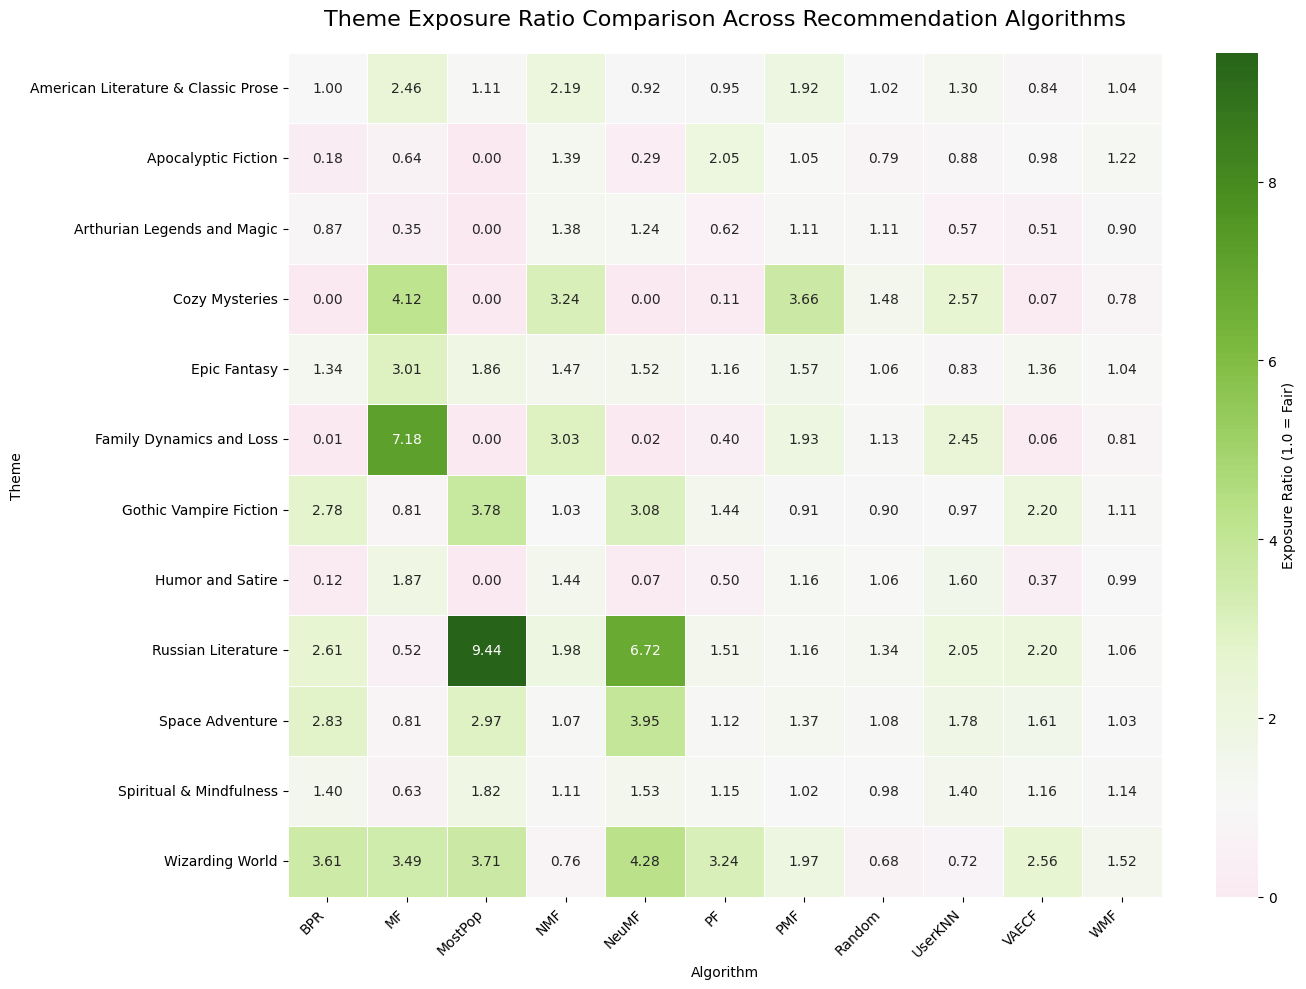

Algorithm,BPR,MF,MostPop,NMF,NeuMF,PF,PMF,Random,UserKNN,VAECF,WMF
Theme,,,,,,,,,,,
American Literature & Classic Prose,0.996181,2.456123,1.113560,2.191969,0.920121,0.950956,1.924525,1.018794,1.303916,0.842211,1.041817
Apocalyptic Fiction,0.176512,0.644114,0.000000,1.387321,0.294186,2.046918,1.046684,0.792755,0.876366,0.984750,1.217003
Arthurian Legends and Magic,0.874326,0.347708,0.000000,1.379942,1.239925,0.620740,1.113910,1.114688,0.567845,0.507949,0.899996
Cozy Mysteries,0.001107,4.121408,0.000000,3.236035,0.004427,0.111778,3.658801,1.477465,2.569793,0.067510,0.781341
Epic Fantasy,1.338797,3.014358,1.863377,1.470888,1.522830,1.163364,1.570644,1.063608,0.833480,1.362532,1.041248
Family Dynamics and Loss,0.010610,7.180355,0.000000,3.030497,0.017241,0.403182,1.928378,1.129971,2.449597,0.059682,0.806364
Gothic Vampire Fiction,2.778956,0.807468,3.777251,1.026419,3.079025,1.441775,0.911133,0.901603,0.970868,2.195552,1.109397
Humor and Satire,0.122348,1.873779,0.000000,1.443346,0.066937,0.496483,1.158312,1.063005,1.596724,0.371919,0.985430
Russian Literature,2.605678,0.522879,9.441444,1.978224,6.720732,1.514605,1.162533,1.335083,2.053170,2.199576,1.057958


In [72]:
plot_exposure_heatmap(rec_dfs,df, top_n=12, row= 'finegrained_Theme', fig='merged.png')

In [73]:
#coverage

In [10]:
def calculate_catalog_coverage(rec_dfs, original_df):
    # Get total unique items in original dataset (N)
    total_items = original_df['ISBN'].nunique()
    
    # Dictionary to store results
    coverage_results = {}
    
    # Calculate coverage for each algorithm
    for algo_name, rec_df in rec_dfs.items():
        # Count unique recommended items (I)
        recommended_items = rec_df['item_id'].nunique()
        
        # Calculate coverage (I/N)
        coverage = (recommended_items / total_items) * 100
        
        # Store result
        coverage_results[algo_name] = {
            'Item_Coverage(%)': round(coverage, 2),
            'Items_Recommended': recommended_items,
            'Total_Items': total_items
        }
    
    # Convert to DataFrame
    coverage_df = pd.DataFrame(coverage_results).T
    
    return coverage_df

def plot_catalog_coverage(coverage_df):
    
    # Set up the figure
    plt.figure(figsize=(12, 6))
    
    colors =  sns.color_palette("blend:#7AB,#EDA")
    # Create bar chart for coverage percentage
    ax = coverage_df['Item_Coverage(%)'].plot(
        kind='bar', 
        color=colors
        
        
    )
    
    # Add title and labels
    plt.title('Item Coverage by Algorithm', fontsize=14)
    plt.ylabel('Coverage Percentage (%)', fontsize=12)
    plt.xlabel('Algorithm', fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(coverage_df['Item_Coverage(%)']):
        ax.text(
            i, 
            v + 1,  # Slightly above the bar
            f"{v}%",
            ha='center',
            fontweight='bold'
        )
    
    # Adjust y-axis to make room for labels
    plt.ylim(0, max(coverage_df['Item_Coverage(%)']) * 1.15)
    
    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    plt.savefig('item_coverage.png')
    # Show the plot
    plt.show()
    
    return ax


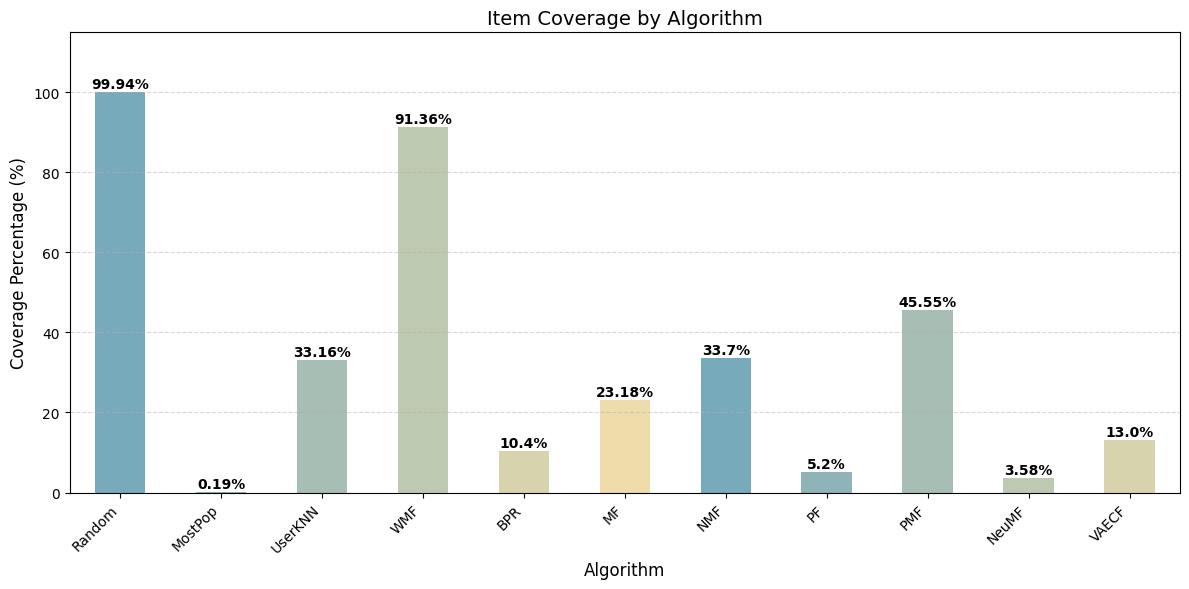

<Axes: title={'center': 'Item Coverage by Algorithm'}, xlabel='Algorithm', ylabel='Coverage Percentage (%)'>

In [11]:

# Example usage:
coverage_df = calculate_catalog_coverage(rec_dfs, df)
plot_catalog_coverage(coverage_df)


In [108]:
coverage_df

,Item_Coverage(%),Items_Recommended,Total_Items
Random,99.96,5227.0,5229.0
MostPop,0.19,10.0,5229.0
UserKNN,33.16,1734.0,5229.0
WMF,91.11,4764.0,5229.0
BPR,9.08,475.0,5229.0
MF,23.79,1244.0,5229.0
NMF,33.70,1762.0,5229.0
PF,5.18,271.0,5229.0
PMF,42.47,2221.0,5229.0
NeuMF,5.03,263.0,5229.0


In [113]:
def calculate_theme_coverage(rec_dfs, original_df, theme_column='merged_Theme'):

    # Get total unique themes in original dataset
    total_themes = original_df[theme_column].nunique()
    all_themes = set(original_df[theme_column].unique())
    
    # Dictionary to store results
    coverage_results = {}
    
    # Calculate coverage for each algorithm
    for algo_name, rec_df in rec_dfs.items():
        # Get themes for recommendations
        theme_mapping = original_df[['ISBN', theme_column]].drop_duplicates()
        recs_with_themes = rec_df.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')
        
        # Count unique themes in recommendations
        recommended_themes = recs_with_themes[theme_column].nunique()
        themes_present = set(recs_with_themes[theme_column].unique())
        themes_missing = all_themes - themes_present
        
        # Calculate coverage
        theme_coverage = (recommended_themes / total_themes) * 100
        
        # Store result
        coverage_results[algo_name] = {
            'Theme_Coverage(%)': round(theme_coverage, 2),
            'Themes_Recommended': recommended_themes,
            'Total_Themes': total_themes,
            'Missing_Themes_Count': len(themes_missing)
        }
    
    # Convert to DataFrame
    coverage_df = pd.DataFrame(coverage_results).T
    
    return coverage_df

def plot_theme_coverage(coverage_df):
    # Set up the figure
    plt.figure(figsize=(12, 6))
    
    # Create bar chart for coverage percentage
    ax = coverage_df['Theme_Coverage(%)'].plot(
        kind='bar', 
        color='lightgreen',
        edgecolor='black'
    )
    
    # Add title and labels
    plt.title('Theme Coverage by Algorithm', fontsize=14)
    plt.ylabel('Coverage Percentage (%)', fontsize=12)
    plt.xlabel('Algorithm', fontsize=12)
    
    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(coverage_df['Theme_Coverage(%)']):
        ax.text(
            i, 
            v + 1,  # Slightly above the bar
            f"{v}%",
            ha='center',
            fontweight='bold'
        )
    
    # Adjust y-axis to make room for labels
    plt.ylim(0, max(coverage_df['Theme_Coverage(%)']) * 1.15)
    
    # Ensure layout doesn't cut off labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return ax


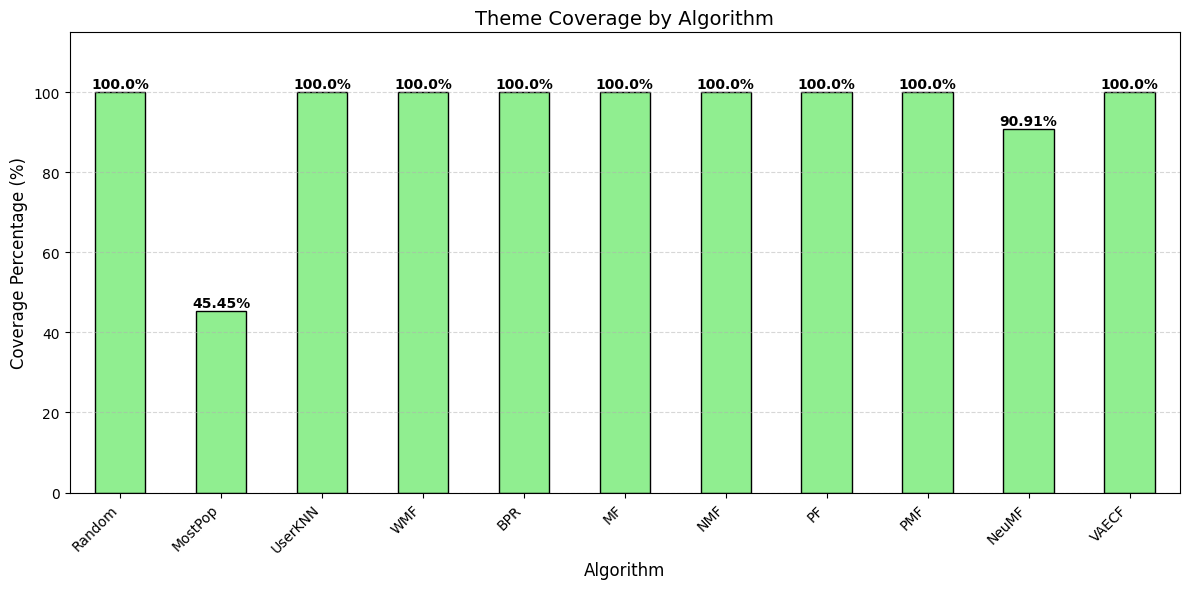

<Axes: title={'center': 'Theme Coverage by Algorithm'}, xlabel='Algorithm', ylabel='Coverage Percentage (%)'>

In [115]:
coverage_df=calculate_theme_coverage(rec_dfs, df, theme_column='merged_Theme')
plot_theme_coverage(coverage_df)